## Datos crudos

Los datos crudos están contenidos en un archivo **CSV** con las siguientes columnas:

- **Liste cheat white**:  
  String binaria en orden, conteniendo los movimientos realizados por el jugador de blancas. Los 10 primeros movimientos de ambas partes son obtenidos de partidas reales.
  Cada movimiento se marca con:
  - `0`: movimiento realizado por `Maia` (red neuronal entrenada con partidas humanas, se ajusta su nivel al nivel de los humanos) o por los jugadores humanos.
  - `1`: movimiento realizado por `Stockfish 16` (el mejor programa de ajedrez, mezcla de reglas manuales y red neuronal).
- **Liste cheat black**:  
  Igual que *Liste cheat white*, pero para el jugador de negras.

- **Game**:  
  La partida de ajedrez completa en formato **PGN** (Portable Game Notation).

- **Elo white**:  
  Puntuación **Elo** del jugador humano de blancas.  
  Se indica `-1` si el valor real es menor que 1000 o mayor que 2000.

- **Elo black**:  
  Puntuación **Elo** del jugador humano de negras.  
  Se indica `-1` si el valor real es menor que 1000 o mayor que 2000.

- **Score**:  
  Resultado final de la partida.

---

📊 **Fuente de los datos**:  
[Chess Cheating Dataset - Kaggle](https://www.kaggle.com/datasets/brieucdandoy/chess-cheating-dataset)


In [5]:
import pandas as pd
games = pd.read_csv('games.csv')
games.head()

,Liste cheat white,Liste cheat black,Game,Elo White,Elo Black,Score
0,00000000001111101010111010100110000001001111,0000000000111001000000001100100000000111000,1. d4 e6 2. c4 d5 3. Nc3 Be7 4. Nf3 Nf6 5. Bf4...,1001,-1,1/2-1/2
1,0000000000000010111101100000100111000111101111001,0000000000110111110111111111111111111011111111111,1. d4 c5 2. c4 cxd4 3. Qxd4 Nc6 4. Qd1 e6 5. N...,1001,-1,1/2-1/2
2,0000000000111001110111100111111110101011110111...,0000000000111111100001111111111111111111010101...,1. e4 e5 2. d4 exd4 3. Qxd4 Nc6 4. Qd3 b6 5. B...,1001,-1,1/2-1/2
3,000000000011111101111111110110101111111,00000000000001101001000011100111100110,1. e4 e5 2. Nf3 Nf6 3. Nc3 Bc5 4. Bc4 d6 5. O-...,1002,-1,1/2-1/2
4,0000000000001000111010111101001010011010011011...,0000000000000000010000001110011010100010001100...,1. d4 d5 2. c4 Nf6 3. Nc3 e6 4. Bg5 Be7 5. e3 ...,1002,-1,1/2-1/2


In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48933 entries, 0 to 48932
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Liste cheat white  48933 non-null  object
 1   Liste cheat black  48933 non-null  object
 2   Game               48932 non-null  object
 3   Elo White          48933 non-null  int64 
 4   Elo Black          48933 non-null  int64 
 5   Score              48933 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.2+ MB


## Vamos a limpiar los datos y familiarizarnos con ellos.

In [11]:
# Añadimos columnas con información adicional
games['N cheat white'] = games['Liste cheat white'].apply(lambda x: x.count('1'))
games['N cheat black'] = games['Liste cheat black'].apply(lambda x: x.count('1'))
games['Total Moves'] = games['Liste cheat white'].str.len() + games['Liste cheat black'].str.len()

# Un poco de limpieza
games = games.drop_duplicates()
games = games[games['Game'].apply(lambda x: isinstance(x, str))]
games = games.dropna()

# Vamos a centrarnos en partidas con Elos conocidos
games = games[(games['Elo White'] != -1) & (games['Elo Black'] != -1)]

print("Número de partidas: ", games.count())
games.head()

Número de partidas:  Liste cheat white    44563
Liste cheat black    44563
Game                 44563
Elo White            44563
Elo Black            44563
Score                44563
N cheat white        44563
N cheat black        44563
Total Moves          44563
dtype: int64


,Liste cheat white,Liste cheat black,Game,Elo White,Elo Black,Score,N cheat white,N cheat black,Total Moves
210,0000000000001110011101111111111101101110111111,000000000001011101010000000101100000010001100,1. d4 d5 2. c4 Nf6 3. Nc3 c6 4. Bg5 Qd6 5. c5 ...,1201,1301,1/2-1/2,28,12,91
211,000000000000000101,00000000000100010,1. e4 e5 2. Bc4 Nf6 3. d3 Bc5 4. Nc3 c6 5. f4 ...,1217,1301,1/2-1/2,2,2,35
212,00000000000111110110010011101010111011101111011,0000000000000000000000001000000000000000000000,1. e4 e5 2. Nf3 Nf6 3. Nxe5 Qe7 4. Nf3 Nxe4 5....,1228,1301,1/2-1/2,25,1,93
213,0000000000011101010100000010011001011001110000...,0000000000111101111111001110110111111111111001...,1. a3 e5 2. h3 Nc6 3. Nc3 Nf6 4. Nf3 d5 5. d3 ...,1246,1301,1/2-1/2,16,37,110
214,000000000000000000000000000,00000000001010100100001100,1. e4 e5 2. Nc3 Bc5 3. Nf3 Qf6 4. Nd5 Qd8 5. B...,1247,1301,1/2-1/2,0,6,53


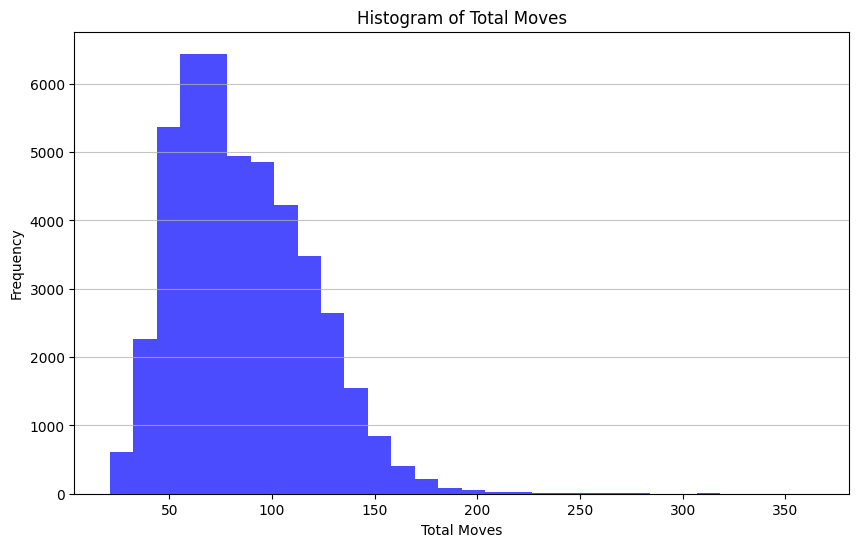

In [12]:
import matplotlib.pyplot as plt

# Histograma del número de movimientos
plt.figure(figsize=(10, 6))
plt.hist(games['Total Moves'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Total Moves')
plt.xlabel('Total Moves')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [23]:
# Vamos a ver las distintas clases de partidas que hay, y seleccionar nuestra muestra

count_black_0_white_gt_0 = len(games[(games['N cheat black'] == 0) & (games['N cheat white'] > 0)])
count_black_gt_0_white_0 = len(games[(games['N cheat black'] > 0) & (games['N cheat white'] == 0)])
count_black_gt_0_white_gt_0 = len(games[(games['N cheat black'] > 0) & (games['N cheat white'] > 0)])
count_black_0_white_0 = len(games[(games['N cheat black'] == 0) & (games['N cheat white'] == 0)])

print("N cheat black = 0 y N cheat white > 0:", count_black_0_white_gt_0)
print("N cheat black > 0 y N cheat white = 0:", count_black_gt_0_white_0)
print("N cheat black > 0 y N cheat white > 0:", count_black_gt_0_white_gt_0)
print("N cheat black = 0 y N cheat white = 0:", count_black_0_white_0)

# Buscamos una muestra equilibrada de partidas
subset_black_0_white_0 = games[(games['N cheat black'] == 0) & (games['N cheat white'] == 0)]
subset_black_0_white_gt_0 = games[(games['N cheat black'] == 0) & (games['N cheat white'] > 0)].sample(n=3500, random_state=42)
subset_black_gt_0_white_0 = games[(games['N cheat black'] > 0) & (games['N cheat white'] == 0)].sample(n=3500, random_state=42)

games = pd.concat([subset_black_0_white_0, subset_black_0_white_gt_0, subset_black_gt_0_white_0])

print(games.count())

N cheat black = 0 y N cheat white > 0: 3500
N cheat black > 0 y N cheat white = 0: 3500
N cheat black > 0 y N cheat white > 0: 0
N cheat black = 0 y N cheat white = 0: 7673
Liste cheat white    14673
Liste cheat black    14673
Game                 14673
Elo White            14673
Elo Black            14673
Score                14673
N cheat white        14673
N cheat black        14673
Total Moves          14673
dtype: int64


## Usamos el programa `Stockfish 17` a una profundidad moderada para analizar las partidas movimiento a movimiento.
El análisis nos aporta un valor en **centipeones**, que quiere decir el número de centésismas de un peón que la partida está inclinada en favor de blancas. En caso de detectar un jaque mate forzado, el programa arroja valores especiales. Empleamos una profundidad de `10` (esto quiere decir, que calcula 10 turnos, no movimientos, en adelante) por restricciones computacionales; las partidas con trampas originalmente lo emplean a una profundidad de `20`.

In [ ]:
from stockfish import Stockfish
import chess.pgn
import io
from tqdm import tqdm  # Importamos tqdm

# Ruta a tu binario de Stockfish
STOCKFISH_PATH = "stockfish/stockfish-windows-x86-64-avx2.exe"

# Configurar el motor de Stockfish
stockfish = Stockfish(path=STOCKFISH_PATH, depth=10)


def evaluar_pgn(pgn_str):
    """Evalúa la partida PGN y devuelve una lista de evaluaciones en cada movimiento."""
    # Leer la partida desde el string PGN
    game = chess.pgn.read_game(io.StringIO(pgn_str))
    
    evaluations = []
    board = game.board()  # Inicializamos el tablero antes de los movimientos

    # Iterar sobre cada movimiento de la partida
    for move in game.mainline_moves():
        # Aplicar el movimiento al tablero
        board.push(move)
        
        # Pasar la posición al motor
        stockfish.set_fen_position(board.fen())
        
        # Obtener la evaluación
        info = stockfish.get_evaluation()
        
        if info["type"] == "mate":
            if info["value"] > 0:
                evaluations.append(f"W-{info['value']}")  
            else:
                evaluations.append(f"B-{-info['value']}")  
        elif info["type"] == "cp":
            evaluations.append(info["value"] / 100.0)  # Convertimos evaluaciones en peones
        else:
            evaluations.append(None)  

    return evaluations


def evaluar_partidas_en_dataframe(df):
    """Añade la columna 'Eval' al DataFrame con una lista de evaluaciones para cada partida."""
    tqdm.pandas()  # Inicializamos tqdm para DataFrame

    # Dividir el DataFrame en bloques del 10%
    num_chunks = 10
    chunk_size = len(df) // num_chunks
    for i in range(num_chunks):
        # Procesar cada bloque de 10%
        start_idx = i * chunk_size
        end_idx = (i + 1) * chunk_size if i < num_chunks - 1 else len(df)

        # Sub-DataFrame con un bloque
        df_chunk = df.iloc[start_idx:end_idx]

        # Evaluar las partidas en este bloque
        df_chunk['Eval'] = df_chunk['Game'].progress_apply(evaluar_pgn)

        # Guardar el bloque procesado
        df_chunk.to_csv(f"Games_Prep_{i+1}.csv", index=False)

    return df


games = evaluar_partidas_en_dataframe(games)
print(games.head())


100%|██████████| 1467/1467 [23:03<00:00,  1.06it/s]
C:\Users\yoyom\AppData\Local\Temp\ipykernel_11416\814489154.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chunk['Eval'] = df_chunk['Game'].progress_apply(evaluar_pgn)
100%|██████████| 1467/1467 [23:35<00:00,  1.04it/s]
C:\Users\yoyom\AppData\Local\Temp\ipykernel_11416\814489154.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chunk['Eval'] = df_chunk['Game'].progress_apply(evaluar_pgn)
100%|██████████| 1467/1467 [24:35<00:00,  1.01s/it]
C:

                                 Liste cheat white  \
1095                           0000000000000000000   
1251                    00000000000000000000000000   
1477                        0000000000000000000000   
1911                        0000000000000000000000   
1917  00000000000000000000000000000000000000000000   

                                Liste cheat black  \
1095                           000000000000000000   
1251                   00000000000000000000000000   
1477                       0000000000000000000000   
1911                       0000000000000000000000   
1917  0000000000000000000000000000000000000000000   

                                                   Game  Elo White  Elo Black  \
1095  1. e4 c5 2. Nf3 Nc6 3. d4 cxd4 4. Nxd4 Qc7 5. ...       1988       2142   
1251  1. e4 e5 2. Bc4 d6 3. Qf3 f6 4. d3 Nc6 5. Bxg8...       1472       1450   
1477  1. e4 e6 2. d4 d5 3. e5 c5 4. c3 Nc6 5. Bb5 Qb...       1492       1528   
1911  1. f3 e5 2. Kf2 Bc5+ 3. Kg


C:\Users\yoyom\AppData\Local\Temp\ipykernel_11416\814489154.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chunk['Eval'] = df_chunk['Game'].progress_apply(evaluar_pgn)


In [ ]:
import ast

# Combinamos los datos
games = pd.read_csv('Games_Prep_1.csv', dtype={"Liste cheat white": str, "Liste cheat black": str})

for i in range(2, 11):
    chunk = pd.read_csv(f"Games_Prep_{i}.csv", dtype={"Liste cheat white": str, "Liste cheat black": str})
    games = pd.concat([games, chunk], ignore_index=True)

games.to_csv('Games_Prep.csv', index=False)

## Procesado final.

In [ ]:
# Procesamos los datos un poco más

def intercalar_binarios(s1, s2):
    """Intercala dos listas o strings en una lista."""
    resultado = []
    max_len = max(len(s1), len(s2))
    
    for i in range(max_len):
        if i < len(s1):
            resultado.append(int(s1[i]))
        if i < len(s2):
            resultado.append(int(s2[i]))
    
    return resultado

def procesar_partidas(games):
    """Combina los movimientos, acota las evaluaciones y añade la información de trampas."""
    rows = []

    for _, row in games.iterrows():
        evals = ast.literal_eval(row['Eval'])[:-2]
        
        for i in range(len(evals)):
            if isinstance(evals[i], str) and evals[i].startswith('W-'):
                evals[i] = +15.0
            elif isinstance(evals[i], str) and evals[i].startswith('B-'):
                evals[i] = -15.0
            else:
                evals[i] = max(-15.0, min(15.0, float(evals[i])))  # Limitar a [-15, 15]
                
        if  row['Liste cheat white'].count('1') > 0:
            cheating_magnitude = row['Liste cheat white'].count('1') / (len(row['Liste cheat white'])-10)

        elif row['Liste cheat black'].count('1') > 0:
            cheating_magnitude = row['Liste cheat black'].count('1') / (len(row['Liste cheat black'])-10)
            evals = [-x for x in evals]
        else:
            cheating_magnitude = 0.0
       
        combined_cheating_pos = intercalar_binarios(row['Liste cheat white'], row['Liste cheat black'])
        
        

        rows.append({
            'evals': evals,
            'cheating_pos':combined_cheating_pos,
            'cheating': cheating_magnitude > 0,
            'cheating_magnitude': cheating_magnitude
        })

    return pd.DataFrame(rows)

# Crear el nuevo DataFrame
games_split = procesar_partidas(games)

# Guardar datos en CSV
games_split.to_csv("Games_Final.csv", index=False)


print(games_split.head())

                                               evals  \
0  [0.52, 0.43, 0.38, 0.33, 0.2, 0.38, 0.35, 0.72...   
1  [0.52, 0.51, 0.09, 0.45, -0.19, 1.04, 0.6, 0.7...   
2  [0.52, 0.6, 0.45, 0.47, 0.16, 0.43, 0.32, 0.2,...   
3  [-0.7, -0.81, -1.71, -2.14, -6.79, -7.26, -7.5...   
4  [0.52, 0.6, 0.45, 0.84, 0.48, 0.54, -0.02, 0.2...   

                                        cheating_pos  cheating  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     False   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     False   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     False   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     False   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     False   

   cheating_magnitude  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  


In [26]:
# Cargamos los datos procesados
games = pd.read_csv('Games_Final.csv') 

# Vamos a quedarnos con las partidas que tienen un valor de trampas significativo, y las que no tienen trampas
games = games[(games['cheating_magnitude'] > 0.2) | (games['cheating_magnitude'] == 0)].reset_index(drop=True)

# Convertimos los datos a listas
evals = games['evals'].to_list()
cheating_pos = games['cheating_pos'].to_list()
cheating_magnitudes = games['cheating_magnitude'].to_list()
cheating = games['cheating'].to_list()

# Corregimos el formato de los datos (al guardar en CSV se convierten en strings)
evals = [ast.literal_eval(evals[i]) for i in range(len(evals))]
cheating_pos = [ast.literal_eval(cheating_pos[i]) for i in range(len(cheating_pos))]

A primera vista es difícil identificar las trampas.

Partida con trampas:
Índice:  7680
Grado de trampas (cheating_magnitude):  0.9


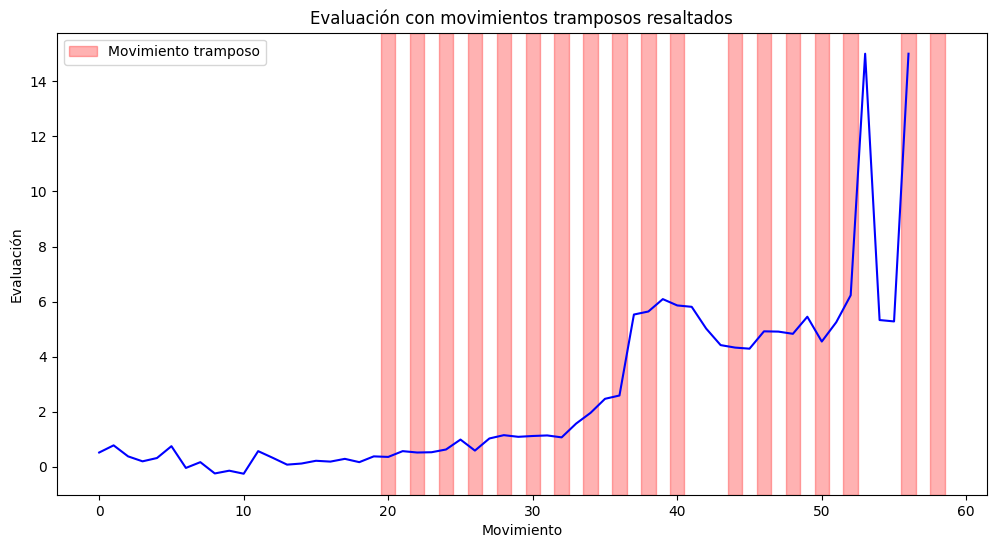

Partida sin trampas:
Índice:  1
Grado de trampas (cheating_magnitude):  0.0


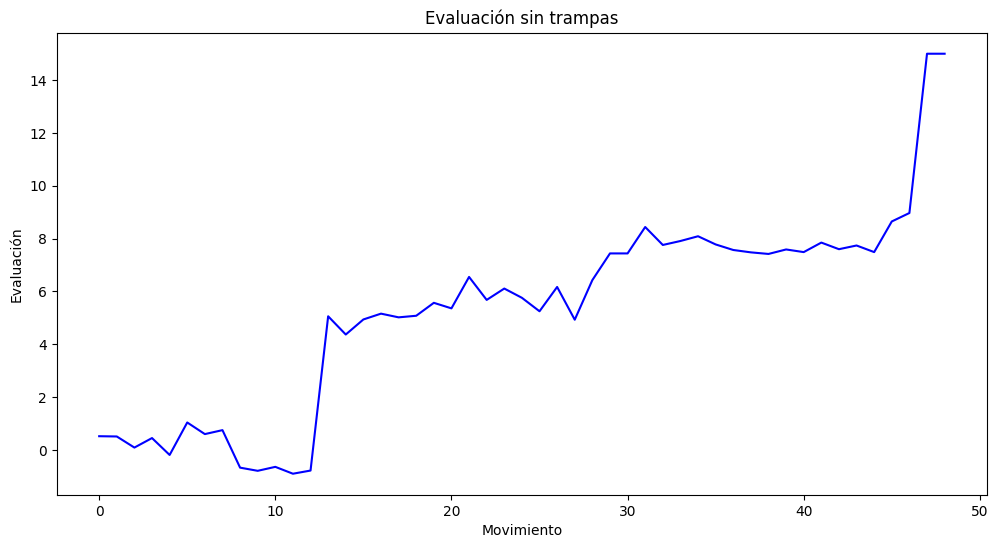

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def plot_evals_trampas(evals, cheating_pos):
    """Plotea los valores de evals y resalta las anomalías indicadas por cheating."""
    evals = np.array(evals)
    cheating_pos = np.array(cheating_pos)

    plt.figure(figsize=(12, 6))
    plt.plot(evals, color='blue')

    # Resaltar las anomalías
    k = 0
    for i in range(len(cheating_pos)):
        if cheating_pos[i] == 1:      
            plt.axvspan(i - 0.5, i + 0.5, color='red', alpha=0.3, label='Movimiento tramposo' if k == 0 else "")
            k += 1

    plt.xlabel('Movimiento')
    plt.ylabel('Evaluación')
    plt.title('Evaluación con movimientos tramposos resaltados')
    plt.legend()
    plt.show()
    
indices = games[games['cheating_magnitude'] > 0].index.tolist()
i = indices[7]
print("Partida con trampas:")
print("Índice: ", i)
print("Grado de trampas (cheating_magnitude): ", cheating_magnitudes[i])
plot_evals_trampas(evals[i], cheating_pos[i])

print("Partida sin trampas:")
i = 1
print("Índice: ", i)
print("Grado de trampas (cheating_magnitude): ", cheating_magnitudes[i])
plt.figure(figsize=(12, 6))
plt.plot(evals[i], color='blue')
plt.title('Evaluación sin trampas')
plt.xlabel('Movimiento')
plt.ylabel('Evaluación')
plt.show()



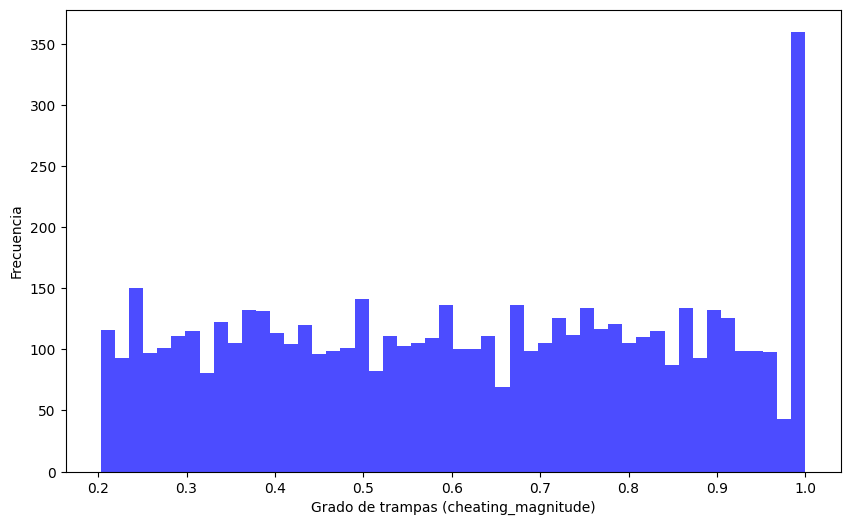

In [ ]:
# Vamos a ver la distribución de los grados de trampas

plt.figure(figsize=(10, 6))
plt.hist([m for m in cheating_magnitudes if m > 0], bins=50, color='blue', alpha=0.7)
plt.xlabel('Grado de trampas (cheating_magnitude)')
plt.ylabel('Frecuencia')
plt.show()

# Hay muchas partidas "muy tramposas"

## Guardado de los datos finales.
Los datos tienen distinta longitud, pero tras varias pruebas, como el momento de los movimientos es importante y las partidas no tienen por qué compartir forma, simplemente vamos a truncar en 150 movimientos, y extender las partidas con menos movimientos con el último valor.

In [ ]:

def pad_with_last_value(sequences, max_len):
    """"Rellena con el último valor de la secuencia hasta max_len."""
    padded = []
    for seq in sequences:
        seq = list(seq)
        if len(seq) >= max_len:
            padded.append(seq[:max_len])
        else:
            last_val = seq[-1] if seq else 0.0  # Poner 0.0 si la secuencia está vacía
            padded_seq = seq + [last_val] * (max_len - len(seq))
            padded.append(padded_seq)
    return np.array(padded, dtype=np.float32)


max_len = 150
X = pad_with_last_value(evals, max_len)
y = np.array(cheating)  

# Guardamos los datos en formato numpy
np.save('X.npy', X)
np.save('y.npy', y)